In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import os

In [2]:
model_5M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_5M/with_k562_bias_final_model/unplug/"
model_25M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_25M/with_k562_bias_final_model/unplug/"
model_50M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_50M/with_k562_bias_final_model/unplug/"
model_100M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_100M/with_k562_bias_final_model/unplug/"
model_500M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.29.2021_bias_filters_500/final_model_step3/unplug/"

In [3]:
def load_data(path):
    motif_set = pkl.load(open(os.path.join(path, "k562_motifs_set1_data"), "rb"))
    motif_set.extend(pkl.load(open(os.path.join(path, "k562_motifs_set2_data"), "rb")))
    return motif_set

In [4]:
data_500M = load_data(model_500M)
data_100M = load_data(model_100M)
data_50M = load_data(model_50M)
data_25M = load_data(model_25M)
data_5M = load_data(model_5M)

In [23]:
# gata, tal, gata+tal
#index = [2,4,3]
#ylims = [0.003, 0.003,0.003]
#ctcf, sp1, nfyb, gabpa
#index = [0,1,5,6]
#ylims = [0.02,0.004, 0.003,0.004]

# bach, nrf, hnf4g
index = [7,8,9]
ylims = [0.01, 0.01,0.003]


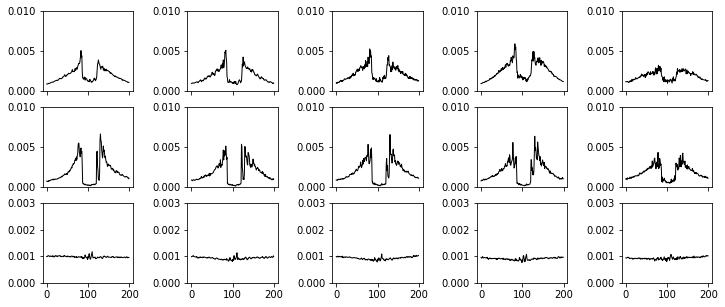

In [24]:
def plot_tracks(pred_unplug_bias, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start
    #ax.plot(range(width), pred_bias[:, start:end].mean(0), 'r', linewidth=1, alpha=0.3, label="uncorrected")
    ax.plot(range(width), pred_unplug_bias[:, start:end].mean(0), 'k', linewidth=1, label="corrected")
    ax.set_ylim(0,ylim)  
    #ax.yaxis.set_ticks([0,0.001,0.002,0.003])
    #ax.legend(

num=31213
import numpy as np
plt.rcParams["figure.figsize"] = (12,5)
#fig, axs = plt.subplots(len(index),5,sharex=True, sharey=True)
fig, axs = plt.subplots(len(index),5,sharex=True)

for i in range(len(index)):
    idx =index[i]
    plot_tracks(np.array(data_500M[idx]).reshape(num,1000), axs[i,0], ylims[i])
    plot_tracks(np.array(data_100M[idx]).reshape(num,1000), axs[i,1], ylims[i])
    plot_tracks(np.array(data_50M[idx]).reshape(num,1000), axs[i,2], ylims[i])
    plot_tracks(np.array(data_25M[idx]).reshape(num,1000), axs[i,3], ylims[i])
    plot_tracks(np.array(data_5M[idx]).reshape(num,1000), axs[i,4], ylims[i])

fig.subplots_adjust(wspace=0.6, hspace=0.2)

plt.show()
    
    